### Домашнее задание №6
* Датасет: https://www.cs.toronto.edu/~kriz/cifar.html
    - https://keras.io/api/datasets/cifar10/
* Первый этап: Создание простой архитектуры модели CNN на Keras для CIFAR-10
    - Постройте небольшую сверточную нейронную сеть (CNN) для классификации изображений из набора данных CIFAR-10.
    - Используйте не менее 2 сверточных слоев с последующим слоем пулинга.
    - Добавьте полносвязный слой и выходной слой с softmax для классификации на 10 классов.
    - Нормализуйте данные и обучите модель, используя минимум 10 эпох.
    - После обучения модели получите точность и выведите графики точности и потерь для каждой эпохи.
* Второй этап: Реализация архитектуры AlexNet
    - Реализуйте архитектуру AlexNet, адаптированную для работы с CIFAR-10 (как в примере).
    - Обучите модель также на 10 эпох и получите точность.
    - Сравните результаты работы AlexNet с первой простой моделью.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.3177 - loss: 1.8485 - val_accuracy: 0.5321 - val_loss: 1.3279
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5143 - loss: 1.3604 - val_accuracy: 0.5984 - val_loss: 1.1443
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5667 - loss: 1.2247 - val_accuracy: 0.6366 - val_loss: 1.0464
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6089 - loss: 1.1144 - val_accuracy: 0.6562 - val_loss: 0.9889
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.6317 - loss: 1.0467 - val_accuracy: 0.6727 - val_loss: 0.9447
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6487 - loss: 1.0075 - val_accuracy: 0.6848 - val_loss: 0.9140
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.6692 - loss: 0.9406 - val_accuracy: 0.6947 - val_loss: 0.8883
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6885 - loss: 0.8985 - 


Test accuracy: 0.7036


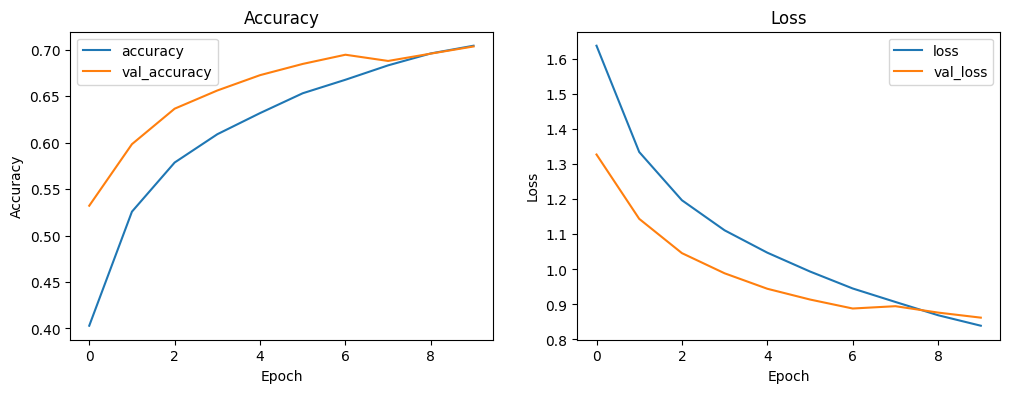

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'\nTest accuracy: {test_acc:.4f}')
plt.figure(figsize=(12, 4))

for i, metric in enumerate(['accuracy', 'loss']):
    plt.subplot(1, 2, i + 1)
    plt.plot(history.history[metric], label=metric)
    plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
    plt.title(metric.capitalize())
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()

plt.show()

In [14]:
def create_alexnet(input_shape):

    model = Sequential([
        Conv2D(96, (3, 3), activation='relu', input_shape=input_shape, padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(256, (5, 5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    return model

alexnet_model = create_alexnet(input_shape=x_train.shape[1:])
alexnet_history = alexnet_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 620s 790ms/step - accuracy: 0.2635 - loss: 1.9442 - val_accuracy: 0.4858 - val_loss: 1.4531
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 578s 739ms/step - accuracy: 0.5225 - loss: 1.3151 - val_accuracy: 0.5984 - val_loss: 1.1197
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 581s 743ms/step - accuracy: 0.6060 - loss: 1.1053 - val_accuracy: 0.6261 - val_loss: 1.0443
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 582s 744ms/step - accuracy: 0.6610 - loss: 0.9614 - val_accuracy: 0.6691 - val_loss: 0.9458
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 583s 746ms/step - accuracy: 0.6899 - loss: 0.8795 - val_accuracy: 0.6748 - val_loss: 0.9503
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 585s 748ms/step - accuracy: 0.7208 - loss: 0.7977 - val_accuracy: 0.6906 - val_loss: 0.8914
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 586s 749ms/step - accuracy: 0.7462 - loss: 0.7275 - val_accuracy: 0.7076 - val_loss: 0.8496
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 585s 749ms/step - accuracy: 0.7638 -


AlexNet Test accuracy: 0.7317


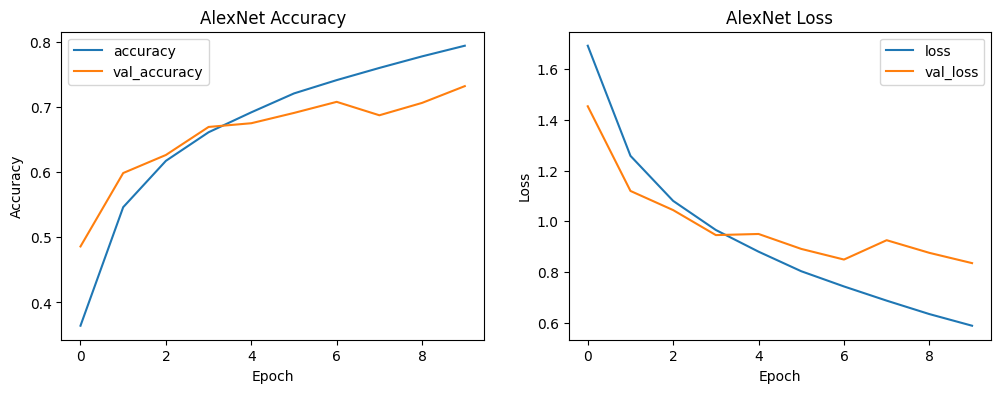

Простая модель Test accuracy: 0.7317
AlexNet Test accuracy: 0.7317


In [15]:
test_loss, test_acc = alexnet_model.evaluate(x_test, y_test, verbose=0)
print(f'\nAlexNet Test accuracy: {test_acc:.4f}')

plt.figure(figsize=(12, 4))

for i, metric in enumerate(['accuracy', 'loss']):
    plt.subplot(1, 2, i + 1)
    plt.plot(alexnet_history.history[metric], label=metric)
    plt.plot(alexnet_history.history[f'val_{metric}'], label=f'val_{metric}')
    plt.title(f'AlexNet {metric.capitalize()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()

plt.show()

print(f"Простая модель Test accuracy: {test_acc:.4f}")
print(f"AlexNet Test accuracy: {test_acc:.4f}")